# truth-level plot

1. m_ttbar_before_FSR

2. m_ttbar_after_FSR

3. m_bbllvv, p4 construction


In [1]:
import sys, os
sys.path.append(os.path.abspath("/afs/desy.de/user/z/zhuxinyu/public/mass_reco/"))
import numpy as np
import ROOT
from ROOT import TCanvas, TLegend, TFile, TPaveLabel, TPaveText, TTree, TLorentzVector, TH1D, TVectorT, gStyle, THStack, gPad, TH2D, TRatioPlot, TAxis
from ROOT import gROOT
import helper,painter

Welcome to JupyROOT 6.24/08


In [2]:
filename = "../user.cgarvey.32744802._000002.output.root"
file = TFile(filename)
truth = file.Get("truth")

In [12]:
for n in range(10000):
     truth.GetEntry(n)
     parton1 = getattr(truth, "PDFinfo_PDGID1")[0]
     parton2 = getattr(truth, "PDFinfo_PDGID2")[0]
     if abs(parton1) != abs(parton2):
          print(n, parton1, parton2)


63 21 3
100 -4 21
132 2 21
136 21 2
150 21 1
177 2 21
248 21 2
348 21 3
355 21 1
382 21 -2
413 21 2
451 21 -2
514 2 21
523 2 21
545 21 -5
585 21 2
609 1 21
683 2 21
731 21 1
752 -1 21
832 21 1
891 21 2
944 21 2
998 -1 21
1000 21 3
1051 -3 21
1071 2 21
1079 2 21
1103 21 1
1135 2 21
1235 21 -3
1242 21 1
1326 21 2
1341 -1 21
1371 21 2
1421 1 21
1463 -2 21
1468 2 21
1504 21 1
1508 21 1
1524 21 1
1551 21 2
1585 2 21
1601 21 1
1615 21 2
1672 1 21
1721 2 21
1894 2 21
1978 2 21
2134 2 21
2181 1 21
2235 5 21
2526 21 2
2536 4 21
2603 21 1
2666 21 2
2725 21 3
2800 21 2
2907 21 -1
2991 2 21
2992 21 2
3088 2 21
3097 21 2
3123 21 4
3210 21 2
3213 2 21
3218 21 5
3251 2 21
3290 21 2
3325 21 2
3431 21 2
3438 21 -1
3472 2 21
3475 3 21
3526 21 2
3533 21 -1
3671 21 1
3696 21 1
3727 -3 21
3752 21 2
3868 21 1
3874 21 -3
3988 -3 21
4062 21 3
4098 2 21
4131 1 21
4145 21 1
4176 2 21
4195 2 21
4227 21 -3
4239 21 4
4260 21 2
4274 21 3
4375 21 1
4485 1 21
4623 21 2
4661 21 1
4691 -5 21
4739 -1 21
4740 21 2
4744 2

In [3]:
m_ttbar_before_FSR  = TH1D ("m_ttbar","m_ttbar" ,50 ,300 ,850)
m_ttbar_after_FSR  = TH1D ("m_ttbar_after_FSR ","m_ttbar_after_FSR" ,50 ,300 ,850)
m_bbllvv =  TH1D ("m_bbllvv ","m_bbllvv" ,50 ,300 ,850)

In [4]:
m_ttbar_before_FSR.Reset()
m_ttbar_after_FSR.Reset()
m_bbllvv.Reset()

In [5]:
for n in range(1000):
# for n in range(truth.GetEntries()):
    truth.GetEntry(n)
    m_ttbar_before_FSR.Fill(getattr(truth, "MC_ttbar_beforeFSR_m")/1000)
    m_ttbar_after_FSR.Fill(getattr(truth, "MC_ttbar_afterFSR_m")/1000)
    # b p4
    p4s_b_from_t_p4 = helper.p4_from_pt_eta_phi_m(truth, "MC_b_from_t")
    p4s_b_from_tbar_p4 = helper.p4_from_pt_eta_phi_m(truth, "MC_b_from_tbar")
    # (llvv)
    MC_Wdecay1_from_t_p4 = helper.p4_from_pt_eta_phi_m(truth, "MC_Wdecay1_from_t")
    MC_Wdecay1_from_tbar_p4 = helper.p4_from_pt_eta_phi_m(truth, "MC_Wdecay1_from_tbar")
    MC_Wdecay2_from_t_p4 = helper.p4_from_pt_eta_phi_m(truth, "MC_Wdecay2_from_t")
    MC_Wdecay2_from_tbar_p4 = helper.p4_from_pt_eta_phi_m(truth, "MC_Wdecay2_from_tbar")
    p4_sys = p4s_b_from_t_p4 + p4s_b_from_tbar_p4 + MC_Wdecay1_from_t_p4 + MC_Wdecay1_from_tbar_p4 + MC_Wdecay2_from_t_p4 + MC_Wdecay2_from_tbar_p4
    m_bbllvv.Fill(p4_sys.M()/1000)


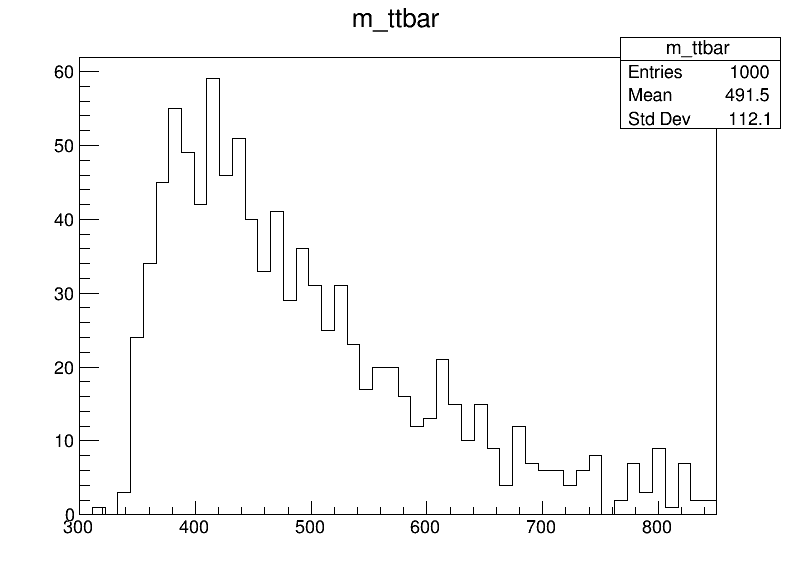

In [6]:
c1 = TCanvas('c1', 'canvas1', 0, 0, 800, 600 )
m_ttbar_before_FSR.SetLineColorAlpha(1, 1)
m_ttbar_before_FSR.Draw("")
m_ttbar_after_FSR.SetLineColorAlpha(2, 1)
# m_ttbar_after_FSR.Draw("same")
m_bbllvv.SetLineColorAlpha(4,1 )
# m_bbllvv.Draw('same')


# rp = TRatioPlot(m_bbllvv,m_ttbar_before_FSR)
# rp.Draw()
# rp.GetLowerRefYaxis().SetTitle("bbllvv/ttbar")
# rp.GetLowerRefYaxis().SetRangeUser(0.5,1.5)
# leg = TLegend(0.7,0.7,0.9,0.82)
# leg.AddEntry(m_ttbar_before_FSR,"m_ttbar_before_FSR","l")
# leg.AddEntry(m_ttbar_after_FSR,"m_ttbar_after_FSR","l")
# leg.AddEntry(m_bbllvv,"m_bbllvv","l")
# leg.Draw()

c1.Draw()

## ratio plot

In [7]:
# cvs, lgd, diffs = painter.create_standard_canvas_with_diff([m_ttbar_before_FSR,m_ttbar_after_FSR,m_bbllvv], 1, tags= ["m_ttbar_before_FSR","m_ttbar_after_FSR","m_bbllvv"], cms_cvs=True, logy=False, show_unity=True, show_error=True, xtitle="RL", setx=[-3, 1], sety=[0, 80])
# cvs.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


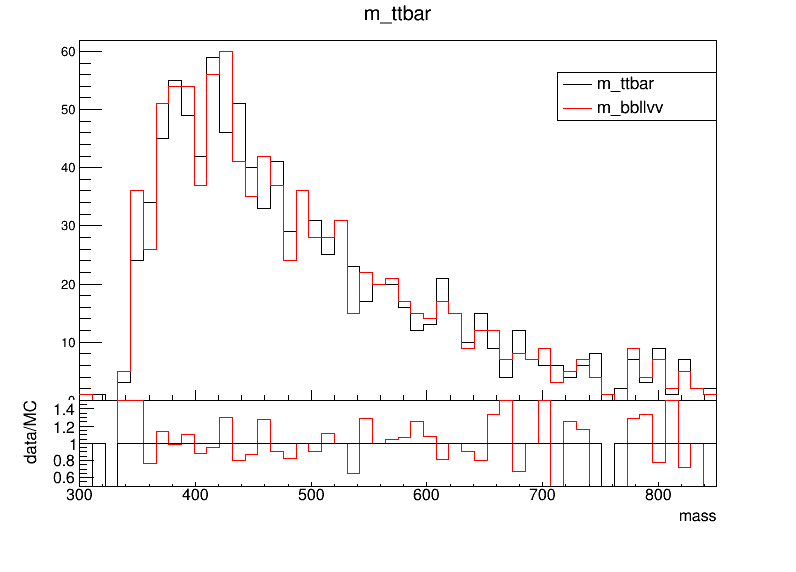

In [12]:
c = ROOT.TCanvas("c", "c", 800, 600)
# Divide the canvas into two pads: one for the upper plot, one for the lower plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Remove the space between the plots
pad1.Draw()
pad1.cd()

m_ttbar_before_FSR.Draw()
m_bbllvv.SetLineColorAlpha(2, 1)

m_bbllvv.Draw('same')
leg = TLegend(0.7,0.7,0.9,0.82)
leg.AddEntry(m_ttbar_before_FSR,"m_ttbar","l")
leg.AddEntry(m_bbllvv,"m_bbllvv","l")
leg.Draw()

# Lower plot
c.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # Remove the space between the plots
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
gStyle.SetOptStat(0)


ratio = m_bbllvv.Clone("ratio")

ratio.SetStats(False)
ratio.SetTitle("")
ratio.GetXaxis().SetLabelOffset(0.005)
ratio.GetXaxis().SetLabelSize(0.12)
ratio.GetXaxis().SetTitleOffset(1.1)
ratio.GetXaxis().SetTitleSize(0.12)
ratio.GetXaxis().SetTitle("NTracks/jet")
ratio.GetYaxis().SetLabelSize(0.12)
ratio.GetYaxis().SetTitleSize(0.13)
ratio.GetYaxis().SetTitle("data/MC")
ratio.GetYaxis().SetTitleOffset(0.3)
ratio.GetYaxis().SetRangeUser(0.9, 1.2)
ratio.GetYaxis().SetNdivisions(506)
ratio.Draw("pe")
ratio.GetYaxis().SetRangeUser(0.5,1.5)
ratio.GetXaxis().SetTitle("mass")
ratio.Divide(m_ttbar_before_FSR)
ratio.Draw("")

ref = m_ttbar_before_FSR.Clone("ref")
ref.Divide(m_ttbar_before_FSR)
ref.Draw("same")
c.Draw()